In [1]:
#Importing common Lib
import selenium
import pandas as pd
import time
from bs4 import BeautifulSoup

#importing selenium web driver
from selenium import webdriver

#for press the enter
from selenium.webdriver.common.keys import Keys

# Importing required Exceptions which needs to handled
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

#Importing requests
import requests

# importing regex
import re

#for saving the image file
import urllib.request

#for the right click button
from selenium.webdriver import ActionChains

In [2]:
#importing the driver from the crome
driver=webdriver.Chrome(r'D:\Datatrained\Web Scrapping\chromedriver.exe')

#opening the webpage url:
url=('https://www.flipkart.com/')
driver.get(url)

time.sleep(2)

#closing the login page
search_cls=driver.find_element_by_xpath('//button[@class="_2KpZ6l _2doB4z"]')
search_cls.click()

#taking the input from the user
#use_inp=input('Enter the phone you want to search on flipkart: ')

#entering the input element in the search box
flip_sear=driver.find_element_by_xpath('//input[@class="_3704LK"]')
flip_sear.send_keys('phones')

#Click on search
btn=driver.find_element_by_xpath('//button[@class="L0Z3Pu"]')
btn.click()

time.sleep(5)
        
#fetching the url to get all the details
prd_url=[]
brand_name=[]
smrtphn_name=[]

#fetching the product url
for q in driver.find_elements_by_xpath('//a[@class="_1fQZEK"]'):
    prd_url.append(q.get_attribute('href'))
    
time.sleep(5)   
lnk_url=[]
page_url=[]
data_review=[]
data_rating=[]


for i in prd_url:
    driver.get(i)
    
        #fetching the product url
    for q in driver.find_elements_by_xpath('//*[@id="container"]/div/div[3]/div[1]/div[2]/div[9]/div[7]/div/a'):
        lnk_url.append(q.get_attribute('href'))
        
    for i in lnk_url:
        driver.get(i)
        
        for a in driver.find_elements_by_xpath("//nav[@class='yFHi8N']/a"):
            page_url.append(a.get_attribute('href'))
        
        for i in page_url[1:]:
            driver.get(i) 
        
            #fetching review           
            review=driver.find_elements_by_xpath("//div[@class='t-ZTKy']")
            for i in review:
                if i.text is None :
                    data_review.append("_") 
                else:
                    data_review.append(i.text.replace('\n','').replace('🔋','').replace('😍','').replace('🤳','').replace('👍','').replace('👌','').replace('🎉','').replace('😘','').replace('🔥','').replace('🤗','').replace('👑','').replace('❤️','')) 
           
            #fetching rating        
            rating=driver.find_elements_by_xpath("//div[@class='col _2wzgFH K0kLPL']/div[1]/div[1]")
            for i in rating:
                if i.text is None :
                    data_rating.append("_") 
                else:
                    data_rating.append(i.text)    
                    
#entering the input element in the search box
search_bar = driver.find_element_by_name("q")
search_bar.click()
search_bar.clear()
search_bar.send_keys("smart watches")

#Click on search
btn=driver.find_element_by_xpath('//button[@class="L0Z3Pu"]')
btn.click()

time.sleep(5)
        
#fetching the url to get all the details
prd_url1=[]
brand_name1=[]
smrtphn_name1=[]


#fetching the product url
for q in driver.find_elements_by_xpath('//a[@class="_1fQZEK"]'):
    prd_url1.append(q.get_attribute('href'))
    
    
lnk_url1=[]
page_url1=[]

for i in prd_url1[:25]:
    driver.get(i)
    
    total_height = int(driver.execute_script("return document.body.scrollHeight"))
    for i in range(1, total_height,10):
        driver.execute_script("window.scrollTo(0, {});".format(i))
    
        #fetching the product url
    for q in driver.find_elements_by_xpath('//*[@id="container"]/div/div[3]/div[1]/div[2]/div[7]/div[5]/div/a'):
        lnk_url1.append(q.get_attribute('href'))
        
    for i in lnk_url1:
        driver.get(i)
        
        for a in driver.find_elements_by_xpath("//nav[@class='yFHi8N']/a"):
            page_url1.append(a.get_attribute('href'))
        
        for i in page_url1[1:11]:
            driver.get(i) 
        
            #fetching review           
            review=driver.find_elements_by_xpath("//div[@class='t-ZTKy']")
            for i in review:
                if i.text is None :
                    data_review.append("_") 
                else:
                    data_review.append(i.text.replace('\n','').replace('🔋','').replace('😍','').replace('🤳','').replace('👍','').replace('👌','').replace('🎉','').replace('😘','').replace('🔥','').replace('🤗','').replace('👑','').replace('❤️','')) 

            #fetching rating        
            rating=driver.find_elements_by_xpath("//div[@class='col _2wzgFH K0kLPL']/div[1]/div[1]")
            for i in rating:
                if i.text is None :
                    data_rating.append("_") 
                else:
                    data_rating.append(i.text) 
                    
time.sleep(5)  
#creating the dataframe
df1=pd.DataFrame({})
df1['Review']=data_review
df1['Rating']=data_rating
 

#exporting data to csv
df1.to_csv('Rating1.csv', index=False)                    

In [1]:
#common lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Preprecessing Lib
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

#outliars and skewness
from scipy import stats
from sklearn.preprocessing import power_transform

#multicoliniarity lib
from statsmodels.stats.outliers_influence import variance_inflation_factor

#model lib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

#Model Evaluation
from sklearn.metrics import classification_report,mean_squared_error,mean_absolute_error,accuracy_score,confusion_matrix,plot_roc_curve

#model cross validation
from sklearn.model_selection import cross_val_score


#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df=pd.read_csv('Rating1.csv',index_col=False)
df.head()

,Review,Rating
0,I am writing this review after using this mobi...,5
1,This product was absolutely good and it is ver...,5
2,Everything is better of the phone except of fr...,5
3,It's a value for money product.. But if you r ...,4
4,This phone is pretty decentBattery backup and ...,4


In [3]:
#checking the shape of dataframe
df.shape

(24113, 2)

In [4]:
#pd.set_option('display.max_rows',None)

In [5]:
# check information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24113 entries, 0 to 24112
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  24113 non-null  object
 1   Rating  24113 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 376.9+ KB


In [6]:
#checking the null values in dataset
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [7]:
#there is no null values available in the  dataset.

<AxesSubplot:>

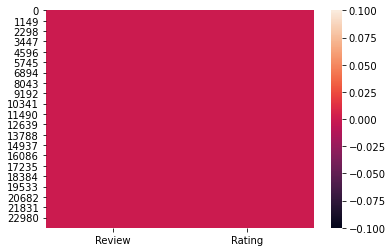

In [8]:
# check null values of train data using heatmap
sns.heatmap(df.isnull())

In [9]:
# check discriptive statistics of the train dataset
df.describe(include='all')

,Review,Rating
count,24113,24113.000000
unique,354,NaN
top,Good,NaN
freq,829,NaN
mean,NaN,4.305644
std,NaN,1.034078
min,NaN,1.000000
25%,NaN,4.000000
50%,NaN,5.000000
75%,NaN,5.000000


In [10]:
#there is no duplicate data in the Review column.

In [11]:
 #Libraries for the text preprocessing
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

In [12]:
#defining the objects
lemmnizer=WordNetLemmatizer()
#stop = stopwords.words('english')
sm=SMOTE()
corpus=[]

In [13]:
#data cleaning and preprocessing on df dataset
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]',' ',df['Review'][i])
    review=review.lower()
    review=review.split()
    
    review=[lemmnizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [17]:
#creating the TF/IDF:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(max_features=2000)

In [18]:
x=tv.fit_transform(corpus).toarray()

In [19]:
#seprating label from the dataframe
y=df['Rating']

In [20]:
y.value_counts()

5    13750
4     6745
3     2047
1     1191
2      380
Name: Rating, dtype: int64

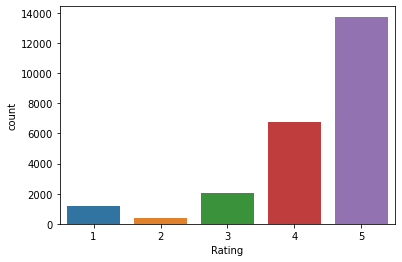

In [21]:
#Plotting count plot for the label
sns.countplot(df['Rating'])
plt.show()

In [22]:
#here we can see data imbalaced issue in the Rating column.
#using Oversampling method to solve the data imbalanced problem.

In [23]:
#checking the data type of both test and train data set
print(x.dtype,y.dtype)

float64 int64


In [24]:
#conceveting both data to float16
x = x.astype('float16')
y = y.astype('float16')

In [25]:
#checking the data type of both test and train data set
print(x.dtype,y.dtype)

float16 float16


In [26]:
#checking the shape of x and y:
print(x.shape,y.shape)

(24113, 1334) (24113,)


In [27]:
#performing over sampling method
x_fit,y_fit=sm.fit_resample(x,y)

In [28]:
#checking the y-fit value counts
y_fit.value_counts()

4.0    13750
3.0    13750
1.0    13750
2.0    13750
5.0    13750
Name: Rating, dtype: int64

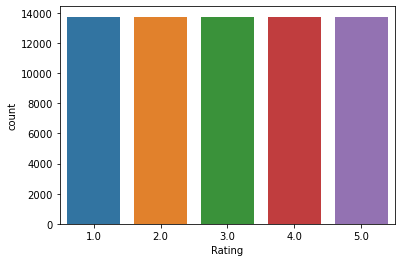

In [29]:
#Plotting count plot for the label
sns.countplot(y_fit)
plt.show()

In [30]:
#seprating the train and test datasets with the best find random state
x_train,x_test,y_train,y_test=train_test_split(x_fit,y_fit,test_size=0.20,random_state=1)

In [31]:
#Using the MultinomialNB algorithm to check the accuray score,MultinomialNB and Confusion Matrix:
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_prednb=nb.predict(x_test

print('\n==========Outputs of MultinomialNB===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_prednb)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_prednb,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_prednb))


==========Outputs of MultinomialNB===========

==========Accuracy Score===========
Accuracy Score is : 89.38%

======Classification Report=============
              precision    recall  f1-score   support

         1.0       1.00      0.91      0.95      2684
         2.0       0.94      1.00      0.97      2690
         3.0       0.76      1.00      0.86      2758
         4.0       0.97      0.73      0.83      2769
         5.0       0.88      0.84      0.86      2849

    accuracy                           0.89     13750
   macro avg       0.91      0.89      0.89     13750
weighted avg       0.91      0.89      0.89     13750
 

=========Confusion Matrix============
[[2436  119  129    0    0]
 [   0 2690    0    0    0]
 [   0    0 2758    0    0]
 [   0   44  398 2015  312]
 [   8   21  361   68 2391]]


In [32]:
#Using the RandomForestClassifier algorithm to check the accuray score,Classification and Confusion Matrix:

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predrfc=rfc.predict(x_test)

print('\n==========Outputs of Random Forest Classifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predrfc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predrfc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predrfc))


==========Outputs of Random Forest Classifier===========

==========Accuracy Score===========
Accuracy Score is : 94.37%

======Classification Report=============
              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99      2684
         2.0       1.00      1.00      1.00      2690
         3.0       0.81      1.00      0.90      2758
         4.0       0.98      0.85      0.91      2769
         5.0       0.98      0.88      0.93      2849

    accuracy                           0.94     13750
   macro avg       0.95      0.94      0.94     13750
weighted avg       0.95      0.94      0.94     13750
 

=========Confusion Matrix============
[[2684    0    0    0    0]
 [   0 2690    0    0    0]
 [   0    0 2758    0    0]
 [  44    0  344 2341   40]
 [   6    0  297   43 2503]]


In [33]:
#Using the Logistics Reggression algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)

print('\n==========Outputs of Logistics Reggression===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predlr)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predlr,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predlr))


==========Outputs of Logistics Reggression===========

==========Accuracy Score===========
Accuracy Score is : 93.82%

======Classification Report=============
              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99      2684
         2.0       1.00      1.00      1.00      2690
         3.0       0.81      1.00      0.89      2758
         4.0       0.99      0.82      0.89      2769
         5.0       0.95      0.88      0.92      2849

    accuracy                           0.94     13750
   macro avg       0.95      0.94      0.94     13750
weighted avg       0.95      0.94      0.94     13750
 

=========Confusion Matrix============
[[2684    0    0    0    0]
 [   0 2690    0    0    0]
 [   0    0 2758    0    0]
 [  44    0  344 2262  119]
 [   6    0  312   25 2506]]


In [34]:
#Using the DecisionTreeClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_preddt=dt.predict(x_test)

print('\n==========Outputs of DT===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_preddt)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_preddt,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_preddt))


==========Outputs of DT===========

==========Accuracy Score===========
Accuracy Score is : 94.37%

======Classification Report=============
              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99      2684
         2.0       1.00      1.00      1.00      2690
         3.0       0.81      1.00      0.90      2758
         4.0       0.98      0.85      0.91      2769
         5.0       0.98      0.88      0.93      2849

    accuracy                           0.94     13750
   macro avg       0.95      0.94      0.94     13750
weighted avg       0.95      0.94      0.94     13750
 

=========Confusion Matrix============
[[2684    0    0    0    0]
 [   0 2690    0    0    0]
 [   0    0 2758    0    0]
 [  44    0  344 2341   40]
 [   6    0  297   43 2503]]


In [35]:
#Using the AdaBoostClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
y_predabc=abc.predict(x_test)

print('\n==========Outputs of ADA Boost===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predabc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predabc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predabc))


==========Outputs of ADA Boost===========

==========Accuracy Score===========
Accuracy Score is : 39.19%

======Classification Report=============
              precision    recall  f1-score   support

         1.0       0.41      0.29      0.34      2684
         2.0       0.99      0.67      0.80      2690
         3.0       0.74      0.04      0.07      2758
         4.0       0.27      0.78      0.40      2769
         5.0       0.28      0.20      0.23      2849

    accuracy                           0.39     13750
   macro avg       0.54      0.39      0.37     13750
weighted avg       0.54      0.39      0.37     13750
 

=========Confusion Matrix============
[[ 783    0    0 1661  240]
 [ 890 1800    0    0    0]
 [  55    0   99 1859  745]
 [ 114   19   23 2147  466]
 [  60    0   11 2218  560]]


In [36]:
#Using the KNeighborsClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predknn=knn.predict(x_test)

print('\n==========Outputs of KNeighborsClassifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predknn)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predknn,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predknn))


==========Outputs of KNeighborsClassifier===========

==========Accuracy Score===========
Accuracy Score is : 94.27%

======Classification Report=============
              precision    recall  f1-score   support

         1.0       1.00      0.98      0.99      2684
         2.0       1.00      1.00      1.00      2690
         3.0       0.81      1.00      0.90      2758
         4.0       0.96      0.86      0.91      2769
         5.0       0.98      0.88      0.93      2849

    accuracy                           0.94     13750
   macro avg       0.95      0.94      0.94     13750
weighted avg       0.95      0.94      0.94     13750
 

=========Confusion Matrix============
[[2626    0    0   58    0]
 [   0 2690    0    0    0]
 [   0    0 2758    0    0]
 [   0    0  344 2385   40]
 [   6    0  297   43 2503]]


In [38]:
print('\n==========Cross Validation Score of Logistices Classifier===========')
cvs_lr=cross_val_score(lr,x_fit,y_fit,cv=5)
print(f"Cross validation for the Logistices Classifier is: {cvs_lr.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of Random Forest Classifier===========')
cvs_rfc=cross_val_score(rfc,x_fit,y_fit,cv=5)
print(f"Cross validation for the Random Forest Classifier is: {cvs_rfc.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of Decision Tree====================')
cvs_dt=cross_val_score(dt,x_fit,y_fit,cv=5)
print(f"Cross validation for the Decision Tree is: {cvs_dt.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of AdaBoost Classifier==============')
cvs_abc=cross_val_score(abc,x_fit,y_fit,cv=5)
print(f"Cross validation for the AdaBoost Classifier is: {cvs_abc.mean()*100:.2f}%\n")

#print('\n===================Cross Validation Score of KNN========================')
#cvs_knn=cross_val_score(knn,x_fit,y_fit,cv=5)
#print(f"Cross validation for the KNN Classifier is: {cvs_knn.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of MultinomialNB========================')
cvs_nb=cross_val_score(nb,x_fit,y_fit,cv=5)
print(f"Cross validation for the MultinomialNB is: {cvs_nb.mean()*100:.2f}%\n")


==========Cross Validation Score of Logistices Classifier===========
Cross validation for the Logistices Classifier is: 94.08%


==========Cross Validation Score of Random Forest Classifier===========
Cross validation for the Random Forest Classifier is: 94.71%


=============Cross Validation Score of Decision Tree====================
Cross validation for the Decision Tree is: 94.71%


=============Cross Validation Score of AdaBoost Classifier==============
Cross validation for the AdaBoost Classifier is: 35.14%


===================Cross Validation Score of MultinomialNB========================
Cross validation for the MultinomialNB is: 89.38%



In [ ]:
#we select the MultinomialNB after comaparing all the models accuracy with the cross validation score.
#LR: Accuracy:94.08   cross validation score:93.82  Diffrence:0.26
#DT: Accuracy:94.71   cross validation score:94.37  Diffrence:0.34
#ADA: Accuracy:35.14   cross validation score:39.19  Diffrence:-4.05
#RFC: Accuracy:94.71   cross validation score:94.37  Diffrence:0.34
#MNB: Accuracy:89.38   cross validation score:89.38  Diffrence:0

#As we can see the MultinomialNB has No differnece and accuracy is also 89.38 so we can select it for hyper parameter tuing.

In [44]:
#Now Appling the gridsearchcv beofore building the model to check the best parameter.
best_param={'alpha':[0.1,0.4,0.7,1,1.2],
           'fit_prior':[True,False]}

In [45]:
gridcv=GridSearchCV(nb,param_grid=best_param)

In [46]:
gridcv.fit(x_train,y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.4, 0.7, 1, 1.2],
                         'fit_prior': [True, False]})

In [47]:
gridcv.best_params_

{'alpha': 0.1, 'fit_prior': True}

In [53]:
#Using the MultinomialNB algorithm to check the accuray score,MultinomialNB and Confusion Matrix:
nb=MultinomialNB(alpha= 0.4, fit_prior= True)
nb.fit(x_train,y_train)
y_prednb=nb.predict(x_test)

print('\n==========Outputs of MultinomialNB===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_prednb)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_prednb,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_prednb))


==========Outputs of MultinomialNB===========

==========Accuracy Score===========
Accuracy Score is : 89.38%

======Classification Report=============
              precision    recall  f1-score   support

         1.0       1.00      0.91      0.95      2684
         2.0       0.94      1.00      0.97      2690
         3.0       0.76      1.00      0.86      2758
         4.0       0.97      0.73      0.83      2769
         5.0       0.88      0.84      0.86      2849

    accuracy                           0.89     13750
   macro avg       0.91      0.89      0.89     13750
weighted avg       0.91      0.89      0.89     13750
 

=========Confusion Matrix============
[[2436  119  129    0    0]
 [   0 2690    0    0    0]
 [   0    0 2758    0    0]
 [   0   44  398 2015  312]
 [   8   21  361   68 2391]]


In [ ]:
#there is no change after the hyper parameter tuning so we as finalizing the MultinomialNB as our final model.

In [54]:
#importiing the library
import joblib

In [55]:
#saving the file
joblib.dump(nb,'Rating_model.pkl')

['Rating_model.pkl']

In [ ]:
#this complete our model building.